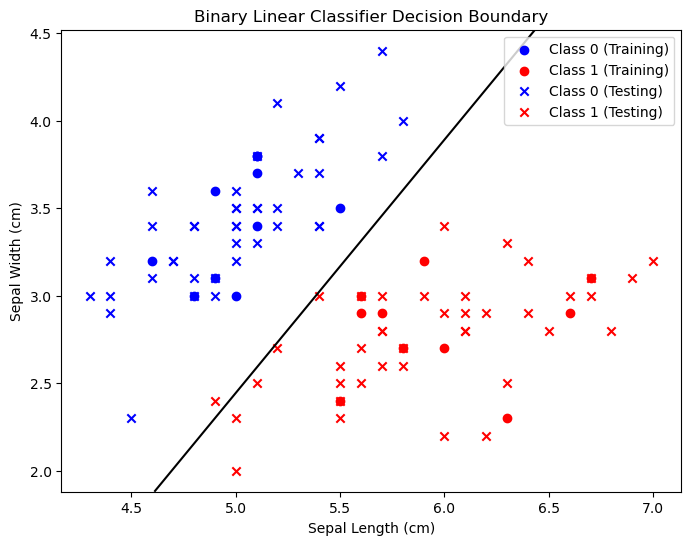

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
iris = load_iris()
X = iris.data[:100, :2] 
y = iris.target[:100]

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=0)

# Create and train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


plt.figure(figsize=(8,6))

# Plot training points

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', label='Class 0 (Training)', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', label='Class 1 (Training)', marker='o')

# Plot testing points
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='blue', label='Class 0 (Testing)', marker='x')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='red', label='Class 1 (Testing)', marker='x')
# Plot the decision boundary
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contour(xx, yy, Z, colors='k', linewidths=3, levels=[0], linestyles=['dashed'], label='Decision Boundary')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = log_reg.predict_proba(xy)[:, 1].reshape(XX.shape)

# Contour plot for decision boundary
ax.contour(XX, YY, Z, levels=[0.5], colors='k', linestyles='-')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Binary Linear Classifier Decision Boundary')
plt.legend(loc="best")
plt.show()


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Calculate training and testing loss
train_loss = log_loss(y_train, log_reg.predict_proba(X_train))
test_loss = log_loss(y_test, log_reg.predict_proba(X_test))

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, log_reg.predict(X_train))
test_accuracy = accuracy_score(y_test, log_reg.predict(X_test))

print(f"Logistic Regression - Training Loss: {train_loss:.2f}, Testing Loss: {test_loss:.2f}")
print(f"Logistic Regression - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")

Logistic Regression - Training Loss: 0.28, Testing Loss: 0.29
Logistic Regression - Training Accuracy: 1.00, Testing Accuracy: 0.99


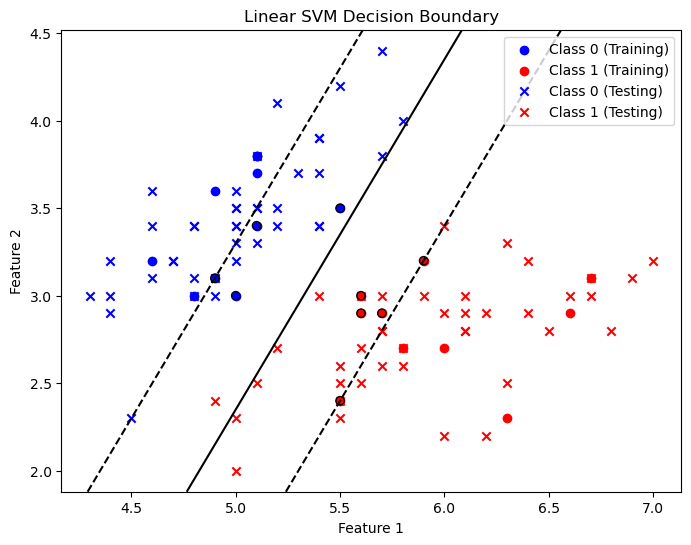

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the iris dataset
iris = load_iris()
X = iris.data[:100, :2]  
y = iris.target[:100]

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=0)

# Create and train a linear SVM classifier
svm = SVC(kernel='linear',probability=True)
svm.fit(X_train, y_train)



plt.figure(figsize=(8, 6))

# Plot training points
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', label='Class 0 (Training)', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', label='Class 1 (Training)', marker='o')

# Plot testing points
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='blue', label='Class 0 (Testing)', marker='x')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='red', label='Class 1 (Testing)', marker='x')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], facecolors='none', edgecolors='k')
plt.title("Linear SVM Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()


In [13]:
# Calculate training and testing accuracy
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)

train_loss = log_loss(y_train, svm.predict_proba(X_train))
test_loss = log_loss(y_test, svm.predict_proba(X_test))

train_accuracy = accuracy_score(y_train, svm.predict(X_train))
test_accuracy = accuracy_score(y_test, svm.predict(X_test))

print(f"Linear SVM - Training Loss: {train_loss:.2f}, Testing Loss: {test_loss:.2f}")
print(f"Linear SVM - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")

Linear SVM - Training Loss: 0.13, Testing Loss: 0.16
Linear SVM - Training Accuracy: 1.00, Testing Accuracy: 0.99


In [14]:
# Get the weight vector
w= svm.coef_

# Calculate the magnitude of the weight vector
magnitude_w = np.linalg.norm(w)

# Calculate the margin
margin = 2 / magnitude_w

# Print the margin value
print(f"The margin of the Linear SVM classifier is: {margin:.2f}")


The margin of the Linear SVM classifier is: 0.85


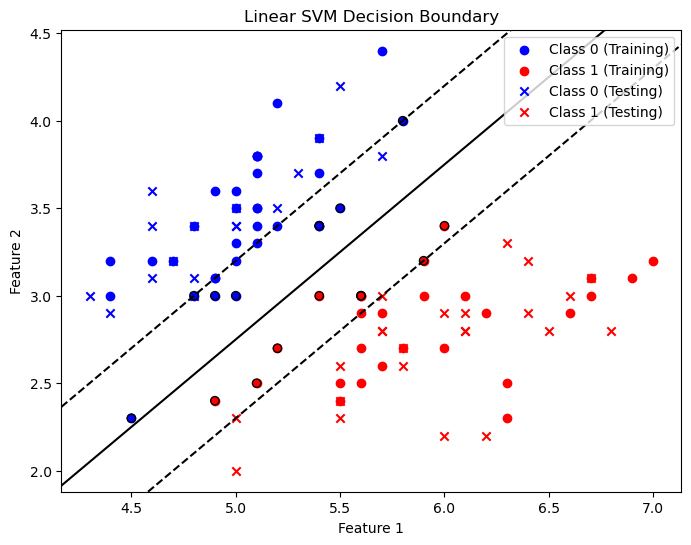

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the iris dataset
iris = load_iris()
X = iris.data[:100, :2]  
y = iris.target[:100]

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=0)

# Create and train a linear SVM classifier
svm = SVC(kernel='linear',probability=True)
svm.fit(X_train, y_train)


plt.figure(figsize=(8, 6))

# Plot training points
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', label='Class 0 (Training)', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', label='Class 1 (Training)', marker='o')

# Plot testing points
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='blue', label='Class 0 (Testing)', marker='x')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='red', label='Class 1 (Testing)', marker='x')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], facecolors='none', edgecolors='k')
plt.title("Linear SVM Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import log_loss, accuracy_score
# Calculate training and testing accuracy
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)

train_loss = log_loss(y_train, svm.predict_proba(X_train))
test_loss = log_loss(y_test, svm.predict_proba(X_test))

train_accuracy = accuracy_score(y_train, svm.predict(X_train))
test_accuracy = accuracy_score(y_test, svm.predict(X_test))

print(f"Linear SVM - Training Loss: {train_loss:.2f}, Testing Loss: {test_loss:.2f}")
print(f"Linear SVM - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")

Linear SVM - Training Loss: 0.07, Testing Loss: 0.02
Linear SVM - Training Accuracy: 1.00, Testing Accuracy: 1.00


In [31]:
xy

array([[4.165     , 1.88      ],
       [4.165     , 1.93387755],
       [4.165     , 1.9877551 ],
       ...,
       [7.135     , 4.4122449 ],
       [7.135     , 4.46612245],
       [7.135     , 4.52      ]])

<Axes: >

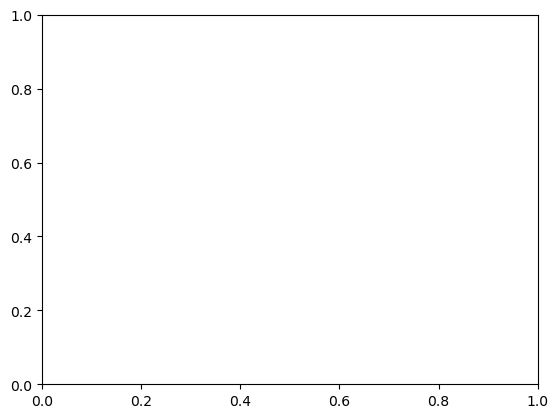

In [52]:
plt.gca()

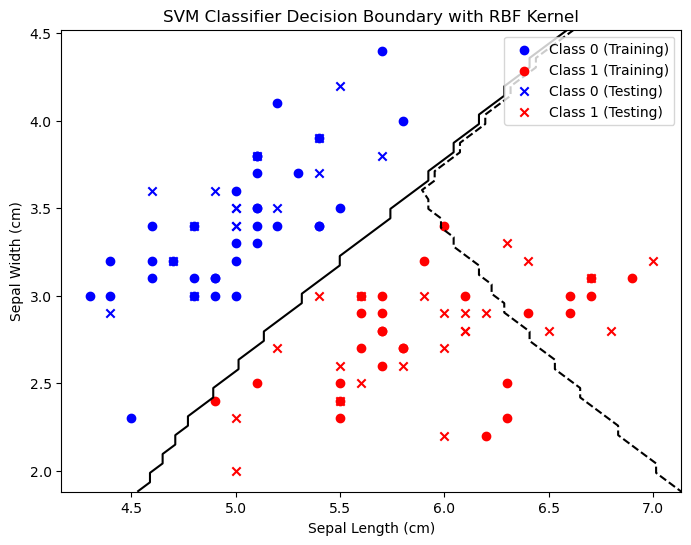

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  
y = iris.target

# Split the dataset into a training set and a test set with a different test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Create and train an SVM classifier with an RBF kernel
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)


plt.figure(figsize=(8,6))

# Plot training points
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', label='Class 0 (Training)', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', label='Class 1 (Training)', marker='o')

# Plot testing points
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='blue', label='Class 0 (Testing)', marker='x')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='red', label='Class 1 (Testing)', marker='x')


# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[-1,0,1], linestyles=['--', '-', '--'])


plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Classifier Decision Boundary with RBF Kernel')
plt.legend()
plt.show()


In [175]:
print("Training data shape: ", X_train.shape)
print("Training labels shape: ", y_train.shape)
print("Testing data shape: ", X_test.shape)
print("Testing labels shape: ", y_test.shape)

Training data shape:  (90, 2)
Training labels shape:  (90,)
Testing data shape:  (60, 2)
Testing labels shape:  (60,)
